In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">08_MNIST(손글씨데이터)_DNN(딥러닝)</font></b>

# 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 봄

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
from matplotlib import pyplot as plt

In [3]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [4]:
print('타겟 :', data[1,0])
#print('이미지(784pixel=28*28) :', data[1, 1:].reshape(28,28))
image = data[1, 1:].reshape(28,28)
image.shape

타겟 : 0.0


(28, 28)

In [5]:
for row in image:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

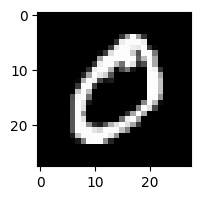

In [7]:
plt.figure(figsize=(2,2))
plt.imshow(image, cmap='gray')

In [ ]:
# 칼라사진 -> 흑백모드로 넘파이 배열로 읽기

In [8]:
%pip install opencv-python==4.8.1.78

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.1 MB 52.4 MB/s eta 0:00:01
   --------- ------------------------------ 9.4/38.1 MB 24.5 MB/s eta 0:00:02
   ---------------- ----------------------- 16.0/38.1 MB 26.5 MB/s eta 0:00:01
   -------------------- ------------------- 19.7/38.1 MB 23.9 MB/s eta 0:00:01
   ------------------------------- -------- 29.9/38.1 MB 29.2 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 31.0 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 29.2 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
import cv2
image_gray = cv2.imread('c:/ai/letNote/05_DeepLearning/sample.jpg', cv2.IMREAD_GRAYSCALE)

In [15]:
image_gray.shape

(408, 612)

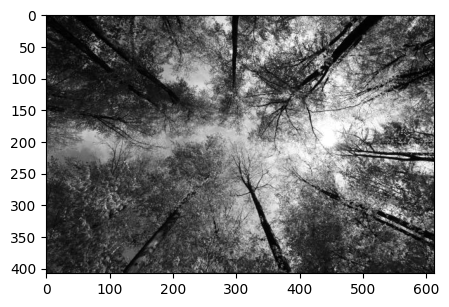

In [16]:
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')

# 1. 데이터

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

2


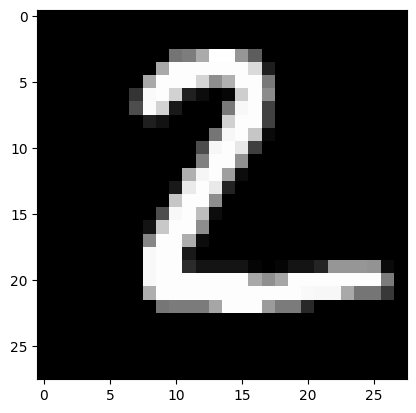

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0  

In [36]:
print(y_test[1])
plt.imshow(X_test[1], cmap='gray')
plt.show()
for row in X_test[1]:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

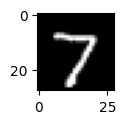

In [37]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[0], cmap='gray')
plt.show()

In [38]:
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [39]:
print('학습셋 :', X_train.shape, y_train.shape)
print('검증셋 :', X_val.shape, y_val.shape)
print('시험셋 :', X_test.shape, y_test.shape)

학습셋 : (50000, 28, 28) (50000,)
검증셋 : (10000, 28, 28) (10000,)
시험셋 : (10000, 28, 28) (10000,)


In [40]:
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [41]:
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_Y.shape, val_Y.shape, test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [42]:
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]

In [43]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

# 2. 모델구성

In [44]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2)) # activation='leakeyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [45]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

# 4. 모델 학습

In [46]:
%%time
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Epoch 1/200
7/7 [==============================] - 0s 29ms/step - loss: 2.3128 - accuracy: 0.1271 - val_loss: 2.2933 - val_accuracy: 0.1367
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2709 - accuracy: 0.1600 - val_loss: 2.2758 - val_accuracy: 0.1467
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2543 - accuracy: 0.1543 - val_loss: 2.2722 - val_accuracy: 0.1433
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2421 - accuracy: 0.1514 - val_loss: 2.2593 - val_accuracy: 0.1367
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2287 - accuracy: 0.1743 - val_loss: 2.2425 - val_accuracy: 0.1833
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 2.2096 - accuracy: 0.2000 - val_loss: 2.2116 - val_accuracy: 0.1933
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 2.1840 - accuracy: 0.1771 - val_loss: 2.1888 - val_accuracy: 0.1767
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 6ms/step - loss: 1.5969 - accuracy: 0.3914 - val_loss: 1.6511 - val_accuracy: 0.4767
Epoch 60/200
7/7 [==============================] - 0s 4ms/step - loss: 1.5901 - accuracy: 0.3943 - val_loss: 1.6464 - val_accuracy: 0.4767
Epoch 61/200
7/7 [==============================] - 0s 3ms/step - loss: 1.5842 - accuracy: 0.3943 - val_loss: 1.6421 - val_accuracy: 0.4767
Epoch 62/200
7/7 [==============================] - 0s 4ms/step - loss: 1.5777 - accuracy: 0.3914 - val_loss: 1.6371 - val_accuracy: 0.4833
Epoch 63/200
7/7 [==============================] - 0s 3ms/step - loss: 1.5722 - accuracy: 0.3957 - val_loss: 1.6331 - val_accuracy: 0.4833
Epoch 64/200
7/7 [==============================] - 0s 4ms/step - loss: 1.5667 - accuracy: 0.3943 - val_loss: 1.6284 - val_accuracy: 0.4800
Epoch 65/200
7/7 [==============================] - 0s 4ms/step - loss: 1.5606 - accuracy: 0.4000 - val_loss: 1.6240 - val_accuracy: 0.4800
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 1.3468 - accuracy: 0.4957 - val_loss: 1.5002 - val_accuracy: 0.5100
Epoch 118/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3438 - accuracy: 0.5000 - val_loss: 1.4993 - val_accuracy: 0.5100
Epoch 119/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3406 - accuracy: 0.4986 - val_loss: 1.4994 - val_accuracy: 0.5067
Epoch 120/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3378 - accuracy: 0.4957 - val_loss: 1.4968 - val_accuracy: 0.5067
Epoch 121/200
7/7 [==============================] - 0s 4ms/step - loss: 1.3347 - accuracy: 0.5043 - val_loss: 1.4947 - val_accuracy: 0.5100
Epoch 122/200
7/7 [==============================] - 0s 6ms/step - loss: 1.3317 - accuracy: 0.5029 - val_loss: 1.4951 - val_accuracy: 0.5067
Epoch 123/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3287 - accuracy: 0.5043 - val_loss: 1.4931 - val_accuracy: 0.5067
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 1.1931 - accuracy: 0.5943 - val_loss: 1.4526 - val_accuracy: 0.5500
Epoch 176/200
7/7 [==============================] - 0s 4ms/step - loss: 1.1902 - accuracy: 0.5929 - val_loss: 1.4534 - val_accuracy: 0.5433
Epoch 177/200
7/7 [==============================] - 0s 6ms/step - loss: 1.1882 - accuracy: 0.5943 - val_loss: 1.4546 - val_accuracy: 0.5433
Epoch 178/200
7/7 [==============================] - 0s 6ms/step - loss: 1.1861 - accuracy: 0.5957 - val_loss: 1.4519 - val_accuracy: 0.5500
Epoch 179/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1833 - accuracy: 0.5957 - val_loss: 1.4537 - val_accuracy: 0.5467
Epoch 180/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1813 - accuracy: 0.5900 - val_loss: 1.4543 - val_accuracy: 0.5367
Epoch 181/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1788 - accuracy: 0.6000 - val_loss: 1.4493 - val_accuracy: 0.5567
Epoch 182/200
7/7 [========

# 5. 모델 평가하기

In [47]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

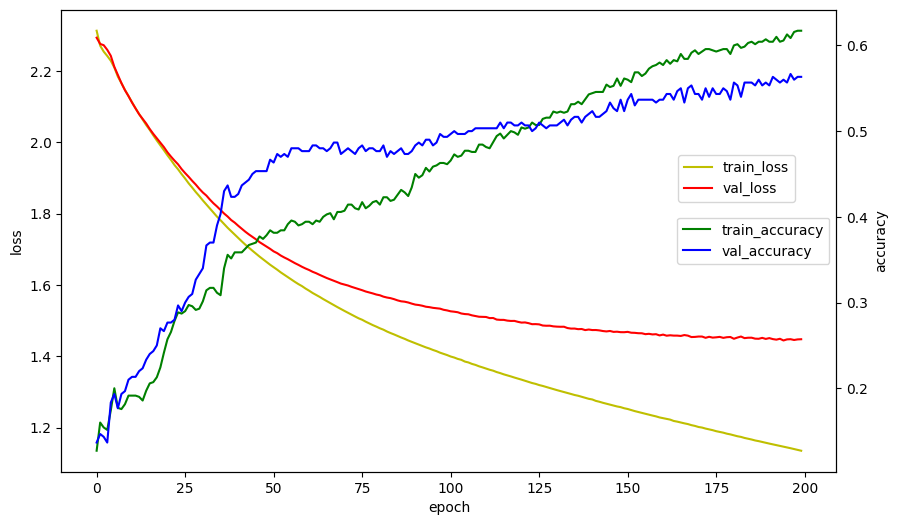

In [48]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [49]:
# 모델 평가(테스트셋)
loss_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_metrics[0])
print('accuracy :', loss_metrics[1])

loss : 1.5047458410263062
accuracy : 0.48420000076293945


# 위 모델(DNN)의 accuracy 늘리기
 - 데이터 확보
 - 모델 수정(레이어 추가, units수 증가)
 - 과적합 방지(validation data 추가, 활성화 함수 relu계열, tanh, dropout)
 - epoch 조정
 - optimizer 변경

In [50]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
# train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
# val_idx   = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X   = val_X[val_idx]
# val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2)) # activation='leakeyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Epoch 1/200
500/500 [==============================] - 1s 2ms/step - loss: 1.8134 - accuracy: 0.3667 - val_loss: 1.5433 - val_accuracy: 0.4217
Epoch 2/200
500/500 [==============================] - 1s 1ms/step - loss: 1.4587 - accuracy: 0.4640 - val_loss: 1.3639 - val_accuracy: 0.5046
Epoch 3/200
500/500 [==============================] - 1s 2ms/step - loss: 1.3311 - accuracy: 0.5281 - val_loss: 1.2665 - val_accuracy: 0.5725
Epoch 4/200
500/500 [==============================] - 1s 1ms/step - loss: 1.2449 - accuracy: 0.5802 - val_loss: 1.1942 - val_accuracy: 0.6005
Epoch 5/200
500/500 [==============================] - 1s 1ms/step - loss: 1.1892 - accuracy: 0.5987 - val_loss: 1.1490 - val_accuracy: 0.6101
Epoch 6/200
500/500 [==============================] - 1s 1ms/step - loss: 1.1515 - accuracy: 0.6101 - val_loss: 1.1182 - val_accuracy: 0.6225
Epoch 7/200
500/500 [==============================] - 1s 1ms/step - loss: 1.1226 - accuracy: 0.6189 - val_loss: 1.0914 - val_accuracy: 0.6311

Epoch 58/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9489 - accuracy: 0.6814 - val_loss: 0.9176 - val_accuracy: 0.7011
Epoch 59/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9480 - accuracy: 0.6807 - val_loss: 0.9194 - val_accuracy: 0.6971
Epoch 60/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9474 - accuracy: 0.6809 - val_loss: 0.9167 - val_accuracy: 0.7007
Epoch 61/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9472 - accuracy: 0.6831 - val_loss: 0.9157 - val_accuracy: 0.7024
Epoch 62/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9466 - accuracy: 0.6814 - val_loss: 0.9164 - val_accuracy: 0.6982
Epoch 63/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9462 - accuracy: 0.6830 - val_loss: 0.9163 - val_accuracy: 0.6997
Epoch 64/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9463 - accuracy: 0.6832 - val_loss: 0.9155 - val_accuracy:

Epoch 115/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9345 - accuracy: 0.6883 - val_loss: 0.9033 - val_accuracy: 0.7030
Epoch 116/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9343 - accuracy: 0.6881 - val_loss: 0.9046 - val_accuracy: 0.7026
Epoch 117/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9334 - accuracy: 0.6875 - val_loss: 0.9072 - val_accuracy: 0.7024
Epoch 118/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9337 - accuracy: 0.6875 - val_loss: 0.9052 - val_accuracy: 0.7021
Epoch 119/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9339 - accuracy: 0.6881 - val_loss: 0.9042 - val_accuracy: 0.7033
Epoch 120/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9339 - accuracy: 0.6881 - val_loss: 0.9043 - val_accuracy: 0.7032
Epoch 121/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9341 - accuracy: 0.6897 - val_loss: 0.9045 - val_ac

500/500 [==============================] - 1s 2ms/step - loss: 0.9301 - accuracy: 0.6896 - val_loss: 0.9033 - val_accuracy: 0.7028
Epoch 172/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9299 - accuracy: 0.6903 - val_loss: 0.9013 - val_accuracy: 0.7029
Epoch 173/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9300 - accuracy: 0.6894 - val_loss: 0.9012 - val_accuracy: 0.7060
Epoch 174/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9292 - accuracy: 0.6907 - val_loss: 0.9043 - val_accuracy: 0.7043
Epoch 175/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9297 - accuracy: 0.6914 - val_loss: 0.8991 - val_accuracy: 0.7038
Epoch 176/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9292 - accuracy: 0.6905 - val_loss: 0.9017 - val_accuracy: 0.7058
Epoch 177/200
500/500 [==============================] - 1s 2ms/step - loss: 0.9292 - accuracy: 0.6901 - val_loss: 0.9012 - val_accuracy: 0.7052

In [51]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

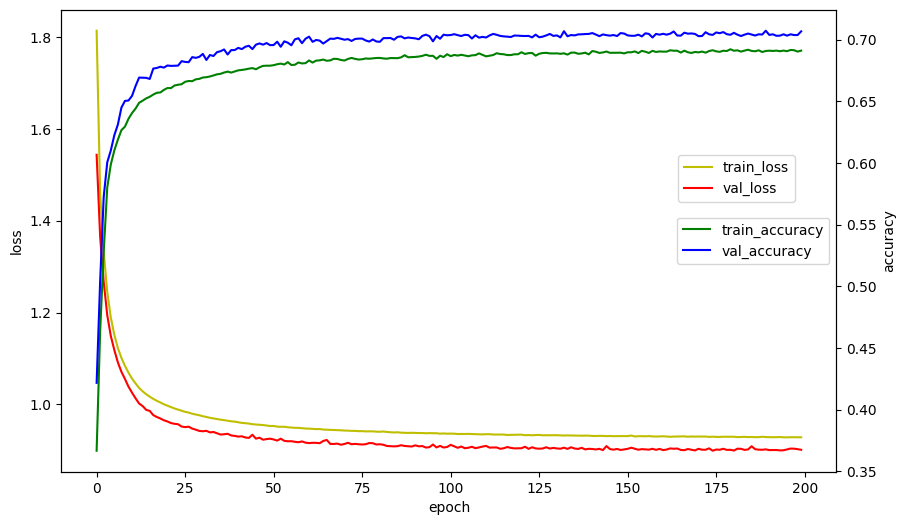

In [52]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [53]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.9409 - accuracy: 0.6962


[0.9408702850341797, 0.6962000131607056]

In [54]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
# train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
# val_idx   = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X   = val_X[val_idx]
# val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024)) # activation='leakeyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=248, activation='elu'))
model.add(Dense(units=100, activation='elu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)


Epoch 1/200
500/500 [==============================] - 5s 9ms/step - loss: 0.2252 - accuracy: 0.9314 - val_loss: 0.1064 - val_accuracy: 0.9681
Epoch 2/200
500/500 [==============================] - 4s 8ms/step - loss: 0.0910 - accuracy: 0.9720 - val_loss: 0.0912 - val_accuracy: 0.9736
Epoch 3/200
500/500 [==============================] - 4s 8ms/step - loss: 0.0609 - accuracy: 0.9813 - val_loss: 0.1069 - val_accuracy: 0.9716
Epoch 4/200
500/500 [==============================] - 4s 8ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0741 - val_accuracy: 0.9788
Epoch 5/200
500/500 [==============================] - 4s 8ms/step - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.0967 - val_accuracy: 0.9731
Epoch 6/200
500/500 [==============================] - 4s 8ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0882 - val_accuracy: 0.9771
Epoch 7/200
500/500 [==============================] - 4s 8ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.1030 - val_accuracy: 0.9756

Epoch 58/200
500/500 [==============================] - 4s 8ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.1364 - val_accuracy: 0.9832
Epoch 59/200
500/500 [==============================] - 4s 9ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.1187 - val_accuracy: 0.9824
Epoch 60/200
500/500 [==============================] - 4s 8ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.1377 - val_accuracy: 0.9824
Epoch 61/200
500/500 [==============================] - 4s 9ms/step - loss: 0.0084 - accuracy: 0.9987 - val_loss: 0.1396 - val_accuracy: 0.9793
Epoch 62/200
500/500 [==============================] - 4s 8ms/step - loss: 0.0091 - accuracy: 0.9982 - val_loss: 0.0988 - val_accuracy: 0.9830
Epoch 63/200
500/500 [==============================] - 4s 9ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1153 - val_accuracy: 0.9841
Epoch 64/200
500/500 [==============================] - 4s 9ms/step - loss: 2.5946e-04 - accuracy: 0.9999 - val_loss: 0.1160 - val_accur

500/500 [==============================] - 5s 9ms/step - loss: 1.6689e-11 - accuracy: 1.0000 - val_loss: 0.2128 - val_accuracy: 0.9848
Epoch 114/200
500/500 [==============================] - 4s 8ms/step - loss: 1.1921e-11 - accuracy: 1.0000 - val_loss: 0.2134 - val_accuracy: 0.9846
Epoch 115/200
500/500 [==============================] - 4s 9ms/step - loss: 1.1921e-11 - accuracy: 1.0000 - val_loss: 0.2139 - val_accuracy: 0.9846
Epoch 116/200
500/500 [==============================] - 4s 9ms/step - loss: 9.5367e-12 - accuracy: 1.0000 - val_loss: 0.2144 - val_accuracy: 0.9846
Epoch 117/200
500/500 [==============================] - 4s 9ms/step - loss: 4.7684e-12 - accuracy: 1.0000 - val_loss: 0.2149 - val_accuracy: 0.9846
Epoch 118/200
500/500 [==============================] - 4s 9ms/step - loss: 4.7684e-12 - accuracy: 1.0000 - val_loss: 0.2154 - val_accuracy: 0.9846
Epoch 119/200
500/500 [==============================] - 4s 9ms/step - loss: 2.3842e-12 - accuracy: 1.0000 - val_loss: 0

500/500 [==============================] - 4s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2268 - val_accuracy: 0.9847
Epoch 169/200
500/500 [==============================] - 4s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2269 - val_accuracy: 0.9847
Epoch 170/200
500/500 [==============================] - 4s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2271 - val_accuracy: 0.9847
Epoch 171/200
500/500 [==============================] - 4s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2272 - val_accuracy: 0.9847
Epoch 172/200
500/500 [==============================] - 4s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2274 - val_accuracy: 0.9847
Epoch 173/200
500/500 [==============================] - 4s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2275 - val_accuracy: 0.9847
Epoch 174/200
500/500 [==============================] - 4s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0

In [55]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

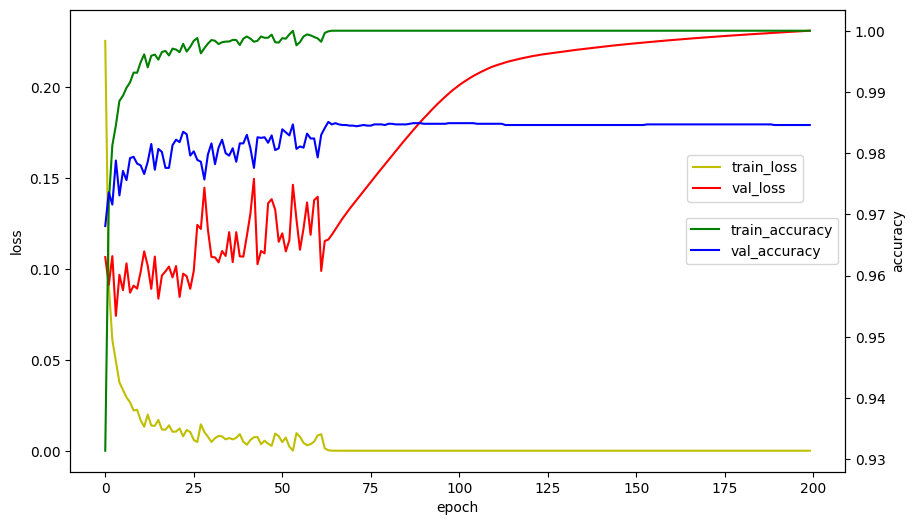

In [56]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [57]:
save_model(model, 'model/08_mnist.h5')

In [64]:
# 모델 평가
score = model.evaluate(test_X, test_Y)
score[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.2238 - accuracy: 0.9867


0.9866999983787537

In [65]:
# 교차표
np.all(test_Y.argmax(axis=1) == y_test) # 실제값(y_test)

True

In [66]:
# model.predict(test_X).argmax(axis=1)
y_hat = np.argmax(model.predict(test_X), axis=1) # 예측값

313/313 [==============================] - 1s 3ms/step


In [67]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,971,1,0,0,0,1,3,2,2,0
1,0,1126,1,1,0,3,3,0,1,0
2,1,1,1021,1,1,0,0,6,1,0
3,0,0,2,994,0,6,0,4,4,0
4,1,0,1,0,967,0,3,1,0,9
5,2,0,0,6,0,878,3,1,2,0
6,3,2,0,0,2,2,949,0,0,0
7,0,2,7,0,0,0,0,1012,3,4
8,0,0,2,4,2,1,1,2,958,4


In [68]:
# 틀린 갯수
10000-10000*score[1]

133.00001621246338

# 콜백함수1 :로그출력

In [70]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [74]:
%%time
# 특정 에포크마다 로그출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        '1 epoch마다 자동 실행되는 함수'
        self.epoch += 1
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.format(
                self.epoch, logs.get('loss'), logs.get('accuracy', '-'),
                logs.get('val_loss', '-'), logs.get('val_accuracy', '-')
            ))
customHistory = CustomHistory()  
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory])

epoch:10, loss:2.1721887588500977, acc:0.19857142865657806, val_loss:2.1689999103546143, val_acc:0.1733333319425583
epoch:20, loss:1.8777507543563843, acc:0.35285714268684387, val_loss:1.9196642637252808, val_acc:0.2966666519641876
epoch:30, loss:1.7263349294662476, acc:0.37714284658432007, val_loss:1.7914412021636963, val_acc:0.3499999940395355
epoch:40, loss:1.6207493543624878, acc:0.4114285707473755, val_loss:1.703709363937378, val_acc:0.3766666650772095
epoch:50, loss:1.5440552234649658, acc:0.4471428692340851, val_loss:1.6388763189315796, val_acc:0.4099999964237213
CPU times: total: 3.14 s
Wall time: 2.29 s


# ※ 콜백함수 3 : ModelCheckpoint
 - epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [75]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
# 모델 자동 자정 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(
                filepath = file,
                monitor='val_accuracy', #모니터할 지표(기본값 val_loss)
                save_best_only=True,    # 모니터링 지표가 개선된 경우만 저장
                mode = 'max', # 값이 클수록 저장
                verbose=1
)

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=20,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[checkpoint]) # 콜백함수

Epoch 1/20
1/7 [===>..........................] - ETA: 3s - loss: 2.2977 - accuracy: 0.1000
Epoch 1: val_accuracy improved from -inf to 0.19000, saving model to ./model08\mnist-001-val0.1900.h5
7/7 [==============================] - 1s 28ms/step - loss: 2.2974 - accuracy: 0.1700 - val_loss: 2.2954 - val_accuracy: 0.1900
Epoch 2/20
1/7 [===>..........................] - ETA: 0s - loss: 2.2850 - accuracy: 0.1900
Epoch 2: val_accuracy did not improve from 0.19000
7/7 [==============================] - 0s 5ms/step - loss: 2.2767 - accuracy: 0.1914 - val_loss: 2.2776 - val_accuracy: 0.1867
Epoch 3/20
1/7 [===>..........................] - ETA: 0s - loss: 2.2576 - accuracy: 0.2000
Epoch 3: val_accuracy did not improve from 0.19000
7/7 [==============================] - 0s 5ms/step - loss: 2.2573 - accuracy: 0.1786 - val_loss: 2.2684 - val_accuracy: 0.1600
Epoch 4/20
1/7 [===>..........................] - ETA: 0s - loss: 2.2452 - accuracy: 0.1800
Epoch 4: val_accuracy improved from 0.19000 to